In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [3]:
train_df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature
test_x = pd.read_csv('./drive/MyDrive/LG_Aimer/test.csv').drop(columns=['ID'])
submit = pd.read_csv('./drive/MyDrive/LG_Aimer/sample_submission.csv')

x_feature_info = pd.read_csv('./drive/MyDrive/LG_Aimer/meta/x_feature_info.csv')
y_feature_info = pd.read_csv('./drive/MyDrive/LG_Aimer/meta/y_feature_info.csv')
y_feature_spec_info = pd.read_csv('./drive/MyDrive/LG_Aimer/meta/y_feature_spec_info.csv')

In [4]:
x_feature_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [ ]:
train_x.head()

In [ ]:
train_x.describe()

In [ ]:
train_x.info()

In [5]:
np.std(train_x)

X_01       2.655949
X_02       0.000372
X_03       5.151102
X_04       0.000000
X_05       0.548346
X_06       2.259791
X_07       7.338111
X_08     220.399661
X_09      66.733882
X_10       0.086253
X_11       0.014145
X_12       0.021806
X_13       0.025333
X_14       0.029865
X_15       0.029468
X_16       0.036741
X_17       0.023436
X_18       0.029093
X_19       0.110481
X_20       0.105265
X_21       0.106867
X_22       0.108980
X_23       0.000000
X_24       0.032440
X_25       0.033148
X_26       0.038512
X_27       0.038055
X_28       0.042782
X_29       0.046688
X_30       0.030412
X_31       0.074519
X_32       0.029945
X_33       0.108027
X_34       0.044029
X_35       0.052237
X_36       0.047829
X_37       0.052292
X_38       0.595413
X_39       0.746656
X_40       0.344482
X_41       0.031127
X_42       0.040288
X_43       0.047210
X_44       0.042175
X_45       0.046967
X_46       2.121490
X_47       0.000000
X_48       0.000000
X_49    8584.319049
X_50       5.989769


In [6]:
columns = train_x.columns

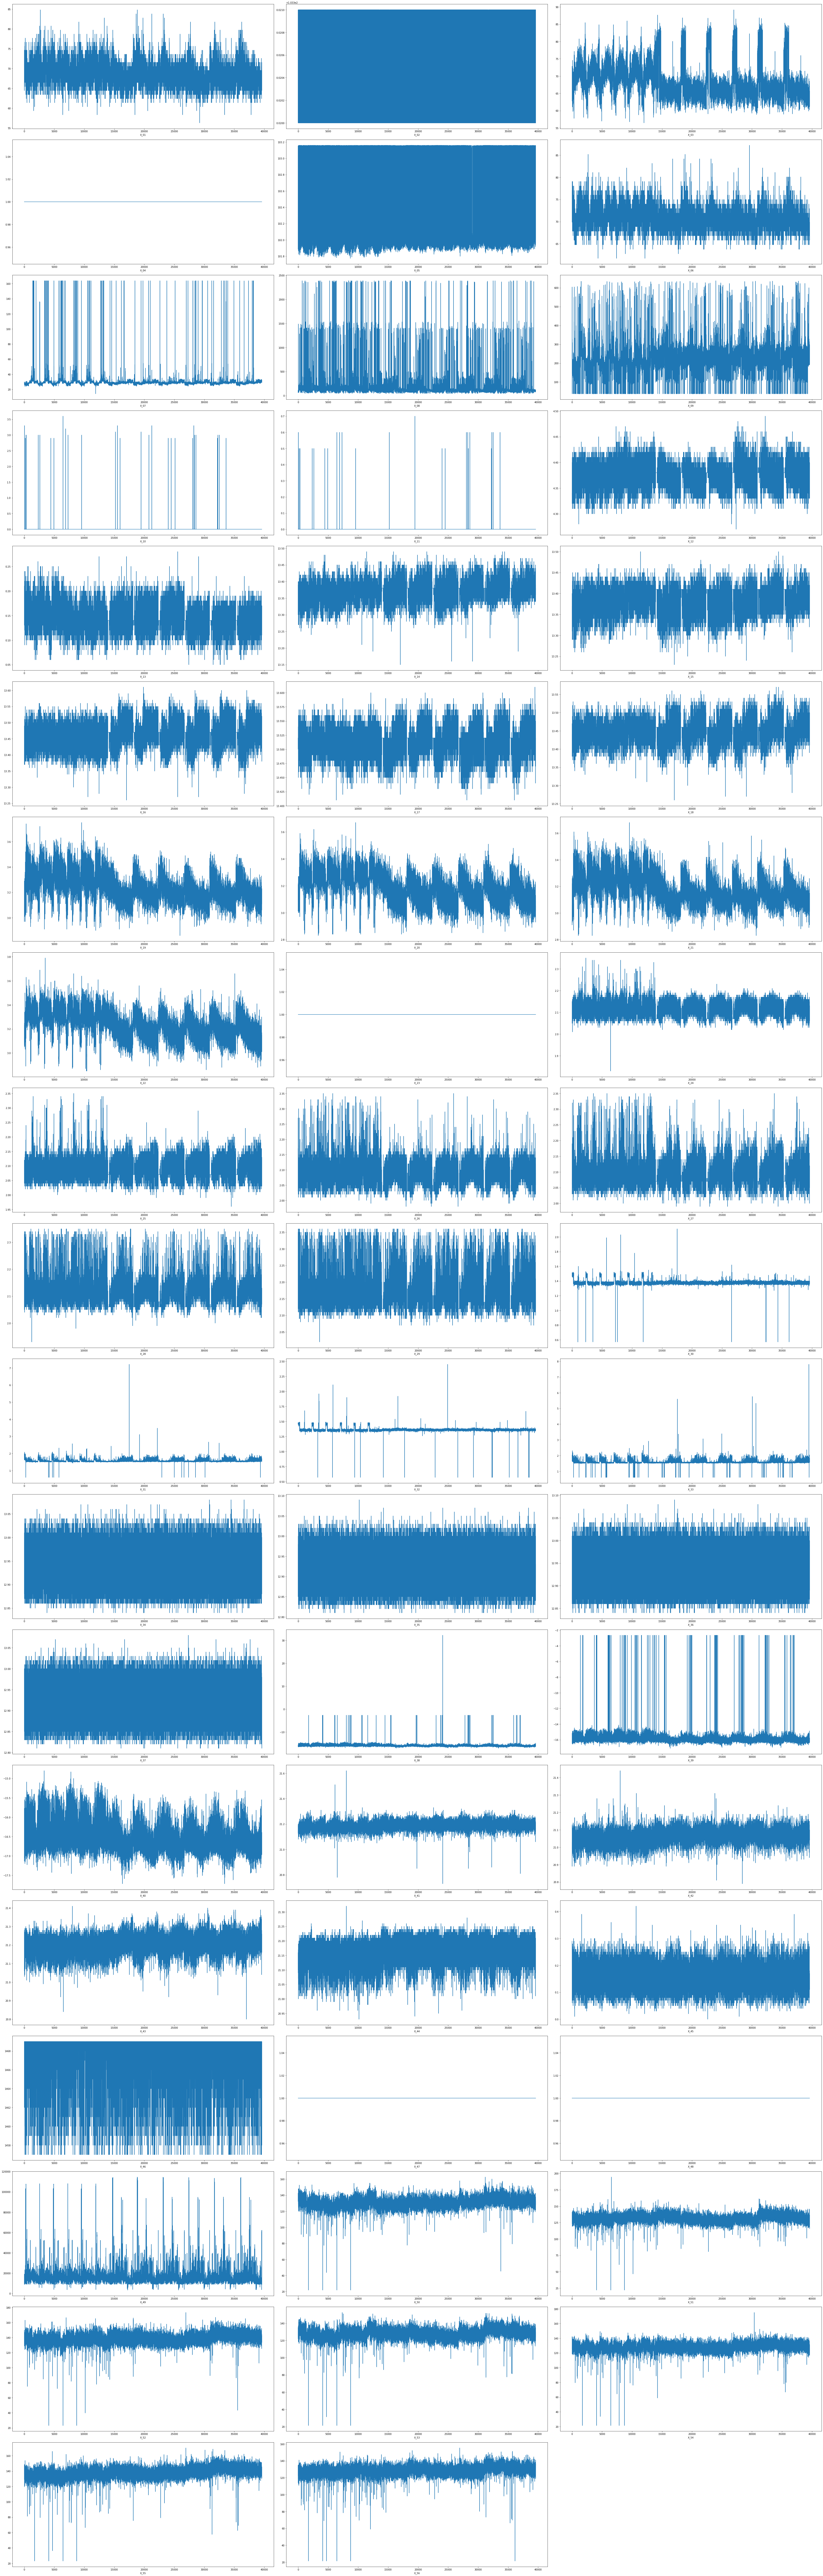

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(48,150))
n=1

for column in columns:
  df = train_x[column]
  ax = plt.subplot(19,3,n)
  plt.xlabel(column)
  ax.plot(df)
  n+=1
plt.tight_layout()
plt.show()

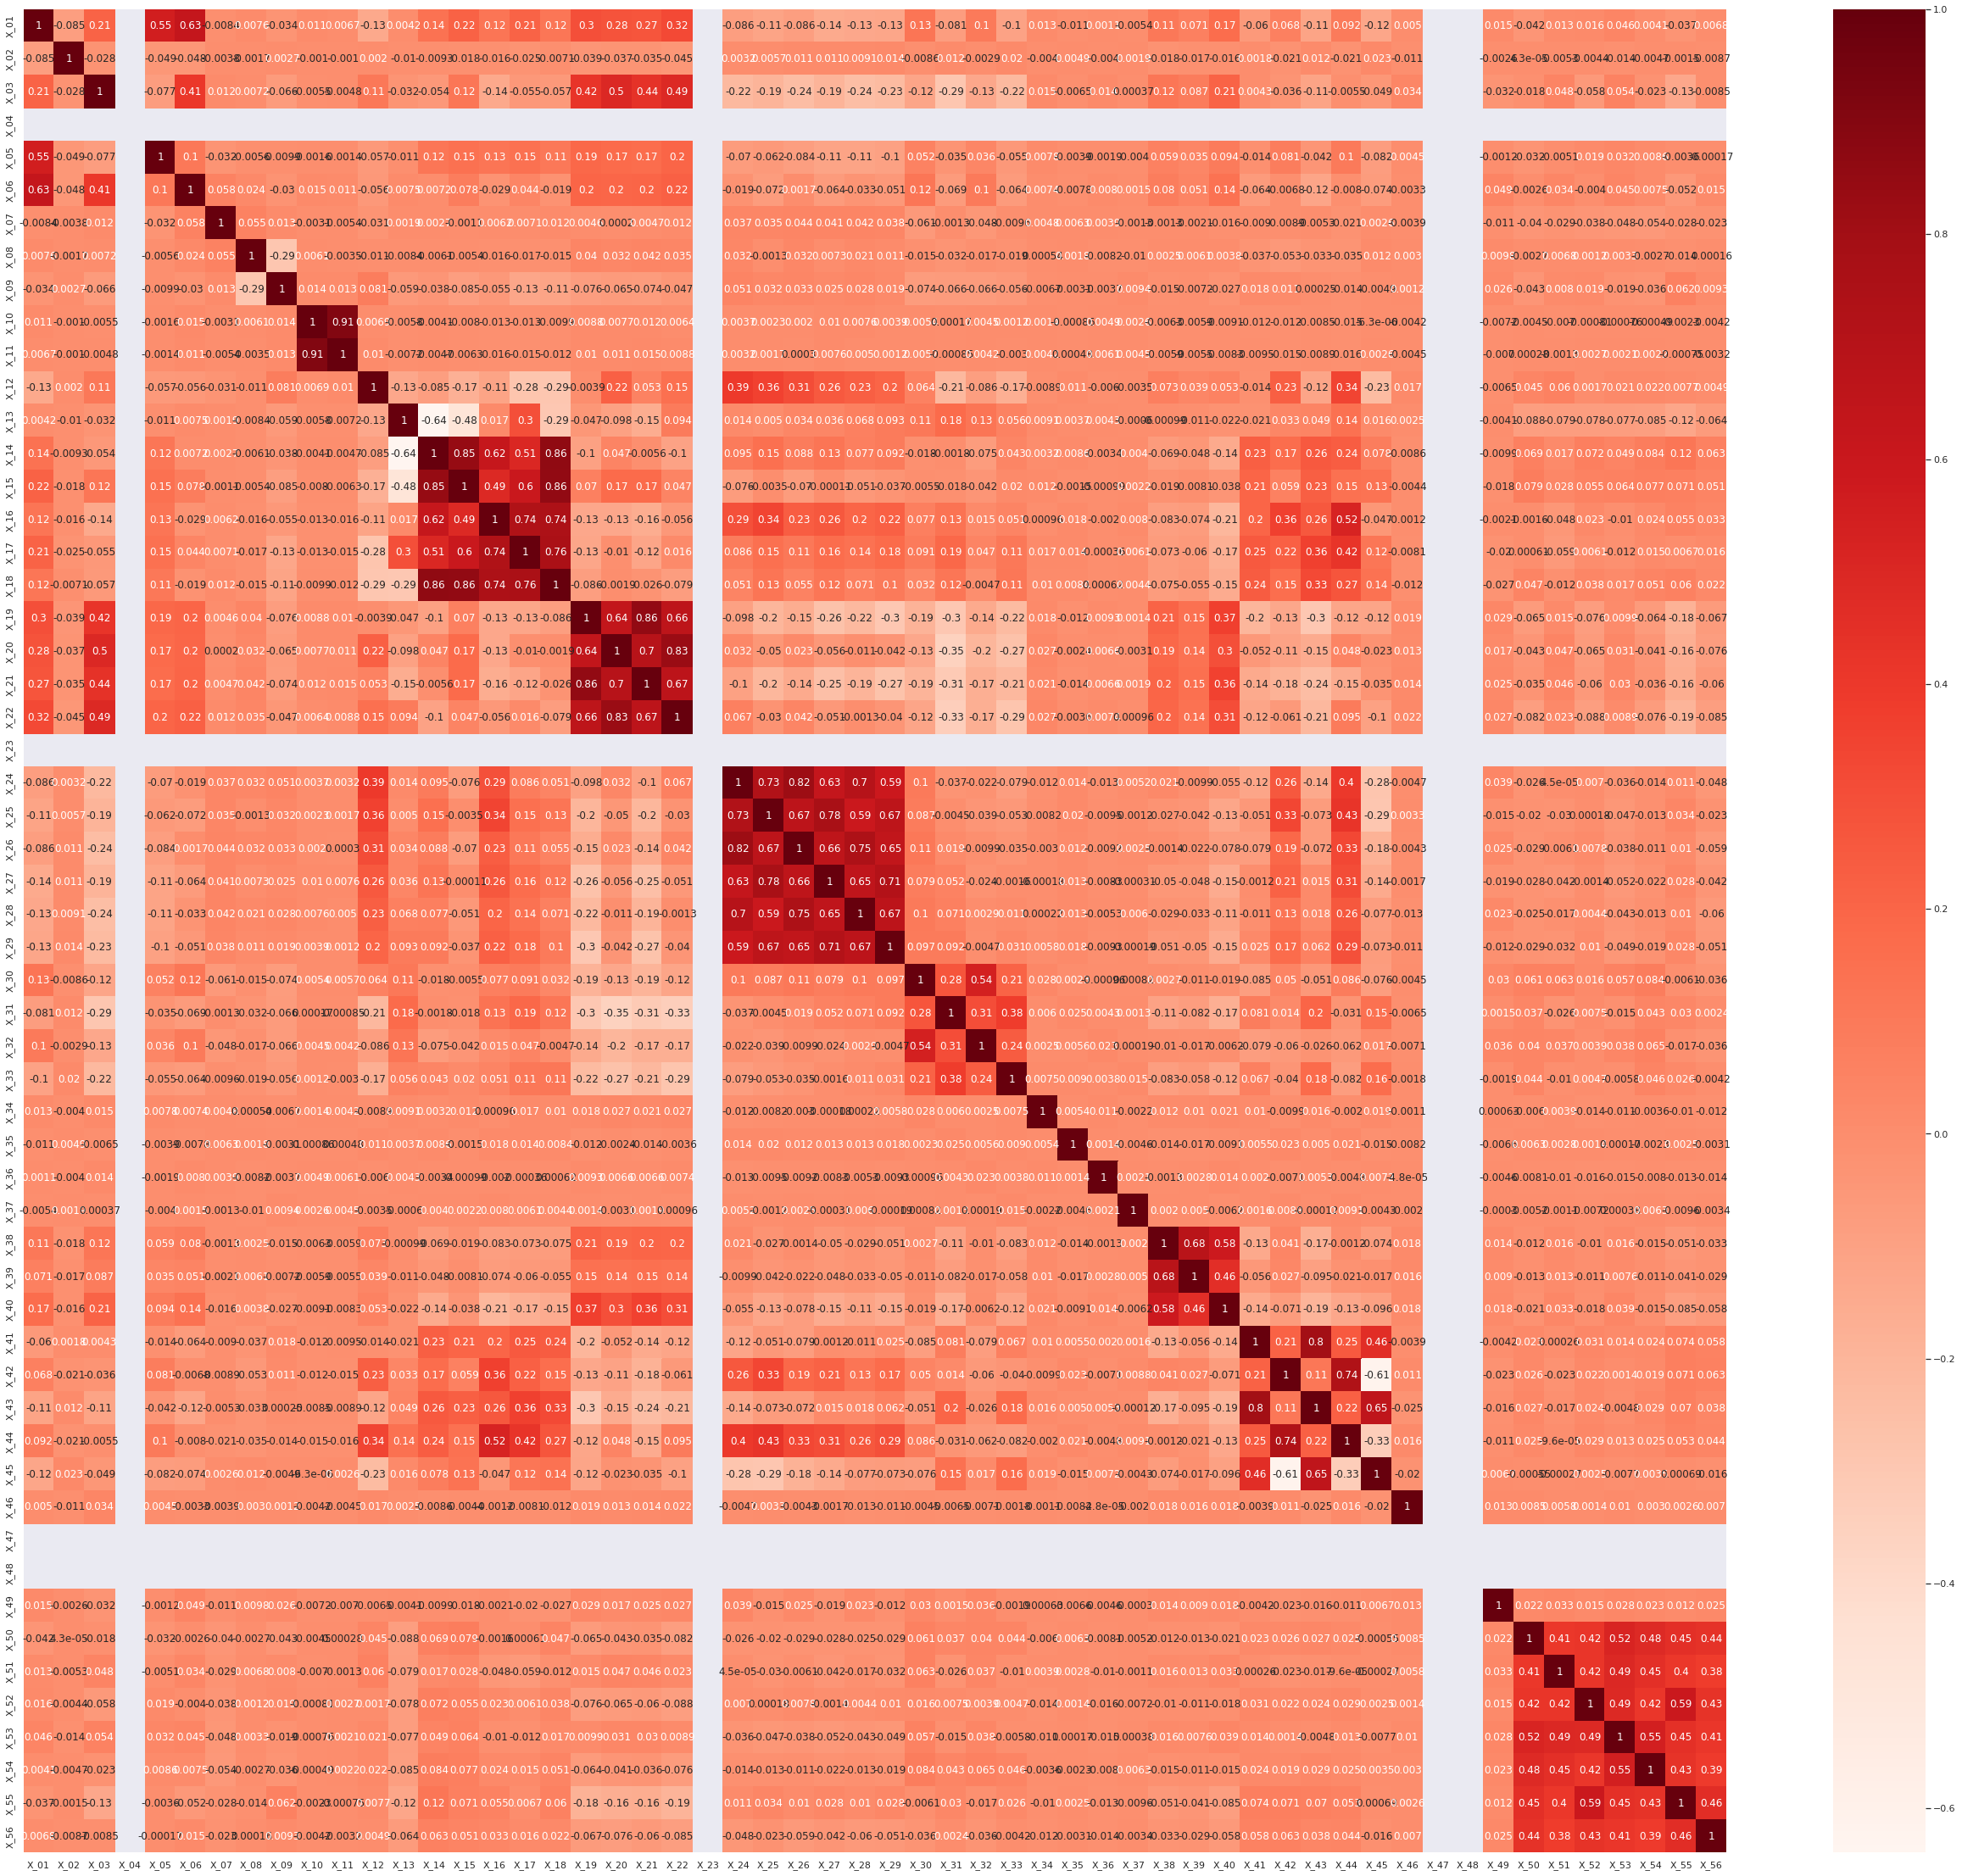

In [8]:
import seaborn as sns
sns.set()

plt.figure(figsize=(45,40))
sns.heatmap(train_x.corr(), annot=True, cmap='Reds')
plt.show()

In [9]:
cor_threshold = 0.5
cor = train_x.corr().abs()
cor_s = cor.unstack()
cor_s

X_01  X_01    1.000000
      X_02    0.084611
      X_03    0.211988
      X_04         NaN
      X_05    0.553974
                ...   
X_56  X_52    0.434694
      X_53    0.414640
      X_54    0.390393
      X_55    0.464821
      X_56    1.000000
Length: 3136, dtype: float64

In [10]:
pairs_to_drop = set()
cols = train_x.columns
for i in range(0, train_x.shape[1]):
  for j in range(0, i+1):
    pairs_to_drop.add((cols[i],cols[j]))

cor_s = cor_s.drop(labels = pairs_to_drop).sort_values(ascending=True)
print(cor_s)

X_10  X_45    0.000006
X_02  X_50    0.000043
X_24  X_51    0.000045
X_36  X_46    0.000048
X_44  X_51    0.000096
                ...   
X_48  X_52         NaN
      X_53         NaN
      X_54         NaN
      X_55         NaN
      X_56         NaN
Length: 1540, dtype: float64


In [ ]:
cor_df = pd.DataFrame(cor_s[cor_s<1].sort_values(ascending=True),columns=['corr_abs'])
cor_df.style.background_gradient(cmap='viridis')

In [12]:
for i in train_x.columns:
  if np.std(train_x[i])==0:
    print(i)

X_04
X_23
X_47
X_48


In [13]:
# train_x = train_x.drop(labels=['X_04','X_23','X_47','X_48'],axis=1,inplace=True)
# train_x.columns()\
drop_sensors = ['X_04','X_23','X_47','X_48']
train_x = train_x.drop(labels = drop_sensors, axis=1, inplace=False)
test_x = test_x.drop(labels = drop_sensors, axis=1, inplace=False)

In [ ]:
train_x

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.fit_transform(test_x)

train_x_scaled_df = pd.DataFrame(train_x_scaled, index=train_x.index,columns = train_x.columns)
test_x_scaled_df = pd.DataFrame(test_x_scaled, index=test_x.index, columns = test_x.columns)
test_x_scaled_df

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,0.040554,2.260007,1.504519,-0.858277,1.500870,0.132752,-0.455129,0.220331,-0.028848,-0.026866,...,0.114225,0.337900,0.065091,1.167788,-0.327366,0.430145,0.899083,0.291720,-0.697323,-1.147960
1,-0.342089,-0.442476,0.102211,-0.630155,-1.217125,-0.182406,-0.211519,-0.542813,-0.028848,-0.026866,...,2.434453,-3.059798,0.054421,0.852418,-0.518531,1.086491,0.528672,0.758549,-0.625393,-0.745829
2,0.423572,-0.442476,0.025372,-0.827253,2.859868,0.023464,0.192934,-0.154978,-0.028848,-0.026866,...,-0.307634,0.337900,-0.206166,-1.646458,-1.843344,-0.971395,-1.255668,0.350543,-1.413082,-2.428440
3,0.423572,-0.442476,-0.570129,-0.860102,1.500870,-0.167156,-0.273584,-0.670029,-0.028848,-0.026866,...,-0.518564,0.337900,-0.161273,0.509586,-1.030228,1.324275,-0.808598,-0.356284,0.259218,-0.327798
4,1.955272,2.260007,-0.416451,-0.814478,1.954018,0.057775,-0.420334,0.101567,-0.028848,-0.026866,...,-1.362283,0.337900,-0.677049,1.134012,0.577800,-0.002848,-0.139382,1.595603,-0.510771,-0.773333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,0.040554,-0.442476,-0.935113,1.495944,-0.764422,0.003131,-0.214437,0.889761,-0.028848,-0.026866,...,-0.940424,0.337900,5.210574,-0.485650,-0.802135,0.074545,-0.455183,0.045003,0.333994,-0.032376
39604,0.040554,-0.442476,-1.434565,1.459445,-0.764422,0.358954,-0.214756,0.712444,-0.028848,-0.026866,...,0.747015,0.337900,5.178552,-0.481491,-1.191298,-0.056755,-1.350439,-0.121335,-0.085765,0.536027
39605,0.423572,-0.442476,-0.992742,1.481344,-0.311275,0.067942,-0.229486,1.061495,-0.028848,-0.026866,...,-0.729494,0.337900,4.999006,-0.349992,-1.077465,0.005966,-0.666313,-0.336940,-0.328386,-0.140192
39606,-0.342089,2.260007,-1.357726,1.479519,-1.217125,0.328455,-0.220366,0.634726,-0.028848,-0.026866,...,-0.940424,0.337900,4.994330,-1.540910,-0.965804,-0.540790,-1.182705,0.220037,-0.765325,0.590180


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vvif = pd.DataFrame()
vvif["VIF Factor"] = [variance_inflation_factor(train_x_scaled_df.values,i) for i in range(train_x_scaled_df.shape[1])]
vvif["features"] = train_x_scaled_df.columns
vvvif = vvif[vvif['VIF Factor']>=5]

다중공산성 10 이상의 변수는 drop해야함

엄격할때는 5 이상

일단은 drop하지 않고 진행해보자!

In [22]:
vvvif

,VIF Factor,features
8,5.767093,X_10
9,5.765482,X_11
11,23.233465,X_13
12,24.649917,X_14
13,11.183650,X_15
14,5.147009,X_16
15,22.969227,X_17
16,14.625564,X_18
39,9.482675,X_42
40,8.465117,X_43


In [16]:
def exponential_smoothing(df, sensors, n_samples, alpha=0.4):
    df = df.copy()
    # first, take the exponential weighted mean
    df[sensors] = df[sensors].apply(lambda x: x.ewm(alpha=alpha).mean()).reset_index(level=0, drop=True)
    
    # second, drop first n_samples of each unit_nr to reduce filter delay
    def create_mask(data, samples):
        result = np.ones_like(data)
        result[0:samples] = 0
        return result
    
    mask = df.transform(create_mask, samples=n_samples).astype(bool)
    df = df[mask]
    
    return df

In [17]:
sensors = train_x_scaled_df.columns
alpha = 0.4
train_x_scaled_df_exp = exponential_smoothing(train_x_scaled_df, sensors, 0, alpha)
test_x_scaled_df_exp = exponential_smoothing(test_x_scaled_df, sensors, 0, alpha)

In [ ]:
train_x

In [ ]:
test_x

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_x_scaled_df_exp, train_y, test_size=0.33, random_state=seed_everything(42))

In [ ]:
y_train

In [ ]:
train_y

In [ ]:
# from sklearn.model_selection import GridSearchCV

# def get_best_params(model, params):
#     grid_model = GridSearchCV(model, param_grid=params, 
#                               scoring='neg_mean_squared_error', cv=5)
#     grid_model.fit(train_x_scaled_df_exp, train_y)
#     rmse = np.sqrt(-1* grid_model.best_score_)
#     print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
#                                         np.round(rmse, 4), grid_model.best_params_))
#     return grid_model.best_estimator_

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.multioutput import MultiOutputRegressor

# xgb_params = {'n_estimators':[1000]}
# xgb_reg = MultiOutputRegressor(XGBRegressor(n_estimators=1000, learning_rate=0.05, 
#                        colsample_bytree=0.5, subsample=0.8))
# best_xgb = get_best_params(xgb_reg, xgb_params)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor 

multi_xgb = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)).fit(x_train, y_train)
preds = multi_xgb.predict(test_x_scaled_df_exp)

[18:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from xgboost import XGBRegressor 
# from sklearn.multioutput import RegressorChain
# from sklearn.linear_model import LogisticRegression

# #logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
# xgb=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree = 0.5, subsample=0.8)

# chain = RegressorChain(base_estimator = xgb,order=None).fit(train_x_scaled_df_exp,train_y)


# preds = chain.predict(test_x_scaled_df_exp)


In [ ]:
# from keras.layers import Sequential
# from keras.layers.core import Dense
# from keras.layers.recurrent import LSTM
# from sklearn.metrics import r2_score
# from sklearn.metrics import accuracy_score

# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import math
# def predict_model(layers):
#         #d = 0.2
#         model = Sequential()
#         model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
#         #model.add(Dropout(d))
#         model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
#         #model.add(Dropout(d))
#         model.add(Dense(16,kernel_initializer='uniform',activation='relu'))        
#         model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
#         model.compile(loss='mean_squared_error',optimizer='adam')
#         return model

# model = predict_model([17,5])
# print(model.summary())

# history = model.fit(
#     x_train,
#     y_train,
#     batch_size=512,
#     epochs=100,
#     validation_split=0.15,
#     verbose=1)

# y_train_pred = model.predcit(x_train)
# #train_score = model.evaluate(train_y, y_train_pred, 'train')

# #print("R-Squared Score ", r2_score(y_train,y_train_pred))
# preds = model.predict(test_x_scaled_df)

# # print("mean_squared_error >> ", mean_squared_error(test_x_scaled_df,pred))
# # print("root_mean_squared_error >> ", math.sqrt(mean_squared_error(test_x_scaled_df,pred)))
# # print("mean_absolute_error >>",mean_absolute_error(test_x_scaled_df,pred))

Done.
Done.


In [ ]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [ ]:
#submit = pd.read_csv('./sample_submission.csv')
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

submit.to_csv('./submit.csv', index=False)

Done.
